In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dropout

import warnings
warnings.filterwarnings("ignore")

In [2]:
gas_turbines = pd.read_csv('D:/DS Assignments/NN/gas_turbines.csv')

In [3]:
gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [4]:
X = gas_turbines.iloc[:,0:10].values

In [5]:
y = gas_turbines.iloc[:,10].values

In [6]:
a = StandardScaler()
a.fit(X)
X = a.transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12345)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12031, 10), (12031,), (3008, 10), (3008,))

In [31]:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(8,input_dim = X.shape[1],kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(6,kernel_initializer = 'uniform',activation = 'elu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'relu'))
    
    model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['mae','mse','mape'])

In [32]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100,validation_data=(X_val, y_val))
test_loss = model.evaluate(X_test,y_test)

Epoch 1/100
121/121 [==============================] - 1s 3ms/step - loss: 18003.5938 - mae: 133.2453 - mse: 18003.5938 - mape: 99.2389 - val_loss: 17252.7734 - val_mae: 130.4044 - val_mse: 17252.7734 - val_mape: 97.3436
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 15581.5928 - mae: 123.6871 - mse: 15581.5918 - mape: 92.0313 - val_loss: 13072.1768 - val_mae: 113.0071 - val_mse: 13072.1768 - val_mape: 84.1494
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 10128.0801 - mae: 97.6443 - mse: 10128.0801 - mape: 72.4225 - val_loss: 6885.5610 - val_mae: 78.9752 - val_mse: 6885.5610 - val_mape: 58.4698
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 4891.6870 - mae: 62.8134 - mse: 4891.6870 - mape: 46.6228 - val_loss: 2878.0044 - val_mae: 45.8928 - val_mse: 2878.0044 - val_mape: 34.1223
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 2542.0986 - mae: 42.7593 - mse: 2542.0986 - mape: 3

Epoch 40/100
121/121 [==============================] - 0s 2ms/step - loss: 569.8740 - mae: 18.8797 - mse: 569.8740 - mape: 14.1277 - val_loss: 33.0747 - val_mae: 4.6627 - val_mse: 33.0747 - val_mape: 3.6114
Epoch 41/100
121/121 [==============================] - 0s 2ms/step - loss: 566.8154 - mae: 18.6380 - mse: 566.8154 - mape: 13.9220 - val_loss: 31.7223 - val_mae: 4.7900 - val_mse: 31.7223 - val_mape: 3.6375
Epoch 42/100
121/121 [==============================] - 0s 2ms/step - loss: 563.2296 - mae: 18.6415 - mse: 563.2296 - mape: 13.9342 - val_loss: 24.8551 - val_mae: 4.1372 - val_mse: 24.8551 - val_mape: 3.1525
Epoch 43/100
121/121 [==============================] - 0s 3ms/step - loss: 541.0209 - mae: 18.3150 - mse: 541.0209 - mape: 13.6873 - val_loss: 23.6462 - val_mae: 4.0905 - val_mse: 23.6462 - val_mape: 3.0948
Epoch 44/100
121/121 [==============================] - 0s 2ms/step - loss: 548.6733 - mae: 18.4819 - mse: 548.6733 - mape: 13.7976 - val_loss: 25.5500 - val_mae: 4.489

121/121 [==============================] - 0s 3ms/step - loss: 407.6932 - mae: 16.1242 - mse: 407.6932 - mape: 11.9827 - val_loss: 11.4243 - val_mae: 3.2406 - val_mse: 11.4243 - val_mape: 2.4127
Epoch 80/100
121/121 [==============================] - 0s 3ms/step - loss: 407.6212 - mae: 16.0669 - mse: 407.6212 - mape: 11.9360 - val_loss: 10.7186 - val_mae: 3.0808 - val_mse: 10.7186 - val_mape: 2.2612
Epoch 81/100
121/121 [==============================] - 0s 3ms/step - loss: 405.0458 - mae: 16.0263 - mse: 405.0458 - mape: 11.9174 - val_loss: 11.2262 - val_mae: 3.2471 - val_mse: 11.2262 - val_mape: 2.4583
Epoch 82/100
121/121 [==============================] - 0s 2ms/step - loss: 404.8956 - mae: 16.0079 - mse: 404.8956 - mape: 11.8872 - val_loss: 7.4658 - val_mae: 2.5790 - val_mse: 7.4658 - val_mape: 1.9066
Epoch 83/100
121/121 [==============================] - 0s 2ms/step - loss: 391.6028 - mae: 15.8398 - mse: 391.6028 - mape: 11.7622 - val_loss: 8.6820 - val_mae: 2.8113 - val_mse: 8.6

In [38]:
test_loss = model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 7.6938 - mae: 2.6576 - mse: 7.6938 - mape: 1.9814


In [33]:
loss = history.history['loss']
acc = history.history['mae']
val_loss = history.history['val_loss']
val_acc = history.history['val_mae']

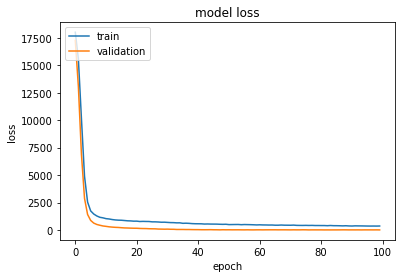

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([[108.91915],
       [162.88358],
       [109.24093],
       ...,
       [140.22862],
       [129.75555],
       [114.09496]], dtype=float32)

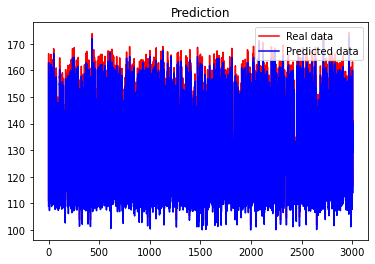

In [37]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()